In [4]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

pca = PCA(n_components=2)

import pickle5 as pickle


ModuleNotFoundError: No module named 'pickle5'

In [ ]:
!pip install pickle5

In [ ]:
df_raw = pd.read_pickle('sources/dataset_integrado.pickle')

In [92]:
df_raw
df_raw.genre

id
4d3XHYFFuYYzxWr2cJ6yQl      jazz
3X3p3u03P8eFL8WTH0oaaU      jazz
4KlXeaheot0OI9PoOWspvZ      jazz
3j76McoUI18gDoqxYE14Bu      jazz
4zxd4tiXPlWMqoJltbVTbE      jazz
                           ...  
5vSsQH8wH68PDKJbNfxzpc    trance
7xYKAlU77jAAnAixQ5IgSn    trance
4hXEgyy5nNgdiBvJcJ9o8u    trance
4HpSbJgNpoOphIeCK3z9sk    trance
30KzbX1viF0aTL1NS5coDY    trance
Name: genre, Length: 4082, dtype: object

In [93]:
# creating a dict file  
genre = {'jazz': 1,'classical' : 2, 'drum-and-bass' : 3, 'death-metal' : 4, 'ambient' : 5,
       'ska' : 6, 'singer-songwriter' : 7, 'opera' : 8, 'trance' : 9} 
df_raw.genre = [genre[item] for item in df_raw.genre] 
df_raw.genre

id
4d3XHYFFuYYzxWr2cJ6yQl    1
3X3p3u03P8eFL8WTH0oaaU    1
4KlXeaheot0OI9PoOWspvZ    1
3j76McoUI18gDoqxYE14Bu    1
4zxd4tiXPlWMqoJltbVTbE    1
                         ..
5vSsQH8wH68PDKJbNfxzpc    9
7xYKAlU77jAAnAixQ5IgSn    9
4hXEgyy5nNgdiBvJcJ9o8u    9
4HpSbJgNpoOphIeCK3z9sk    9
30KzbX1viF0aTL1NS5coDY    9
Name: genre, Length: 4082, dtype: int64

In [94]:
k = 8

In [95]:
X = np.array(df_raw[["t02_75","t03_75","t04_75","t05_75","t06_75","t07_75","t08_75","t09_75","t10_75","t11_75"]])
y = np.array(df_raw['genre'])
X.shape

(4082, 10)

([], <a list of 0 Text major ticklabel objects>)

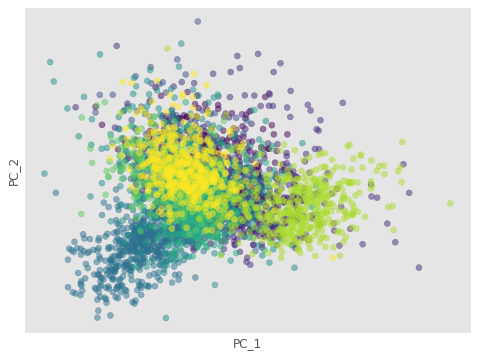

In [96]:
# Proyecto los datos sobre PC_1 y PC_2 para graficar
pca.fit(X)
x_pca = pca.transform(X)

# Grafico los datos con las etiquetas originales
plt.figure(1, figsize=(8, 6))
plt.clf()
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y, alpha = 0.5, edgecolor=None)
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.xticks(())
plt.yticks(())

In [97]:
kmeans = KMeans(n_clusters=k).fit(X)

([], <a list of 0 Text major ticklabel objects>)

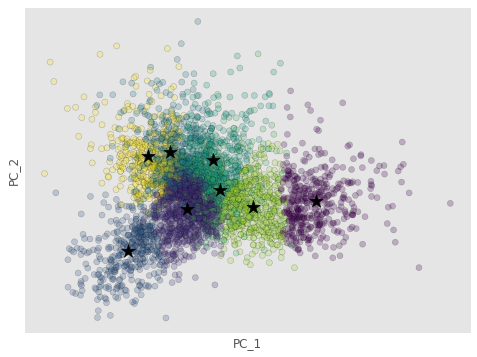

In [98]:
centroides_sklean_pca = pca.transform(kmeans.cluster_centers_)

plt.figure(1, figsize=(8, 6))
plt.clf()
#plt.scatter(x[:, 0], x[:, 1], color='k', alpha=.25, edgecolor='k')
plt.scatter(x_pca[:, 0], x_pca[:, 1], 
            c=kmeans.labels_, alpha=.25, edgecolor='k')
plt.scatter(centroides_sklean_pca[:, 0], centroides_sklean_pca[:, 1], 
            s=200, marker = '*', c='k', edgecolor=None)
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.xticks(())
plt.yticks(())